In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Introduction
The dataset used in this analysis is housing prices with a variety of features for each house. This includes:

- MS Sub Class
- MS Zoning
- Lot Area
- Lot Configuration
- Building Type
- Overall Condition
- Year Built
- Year Remodeled
- Exterior
- Finished Basement Square Footage
- Total Basement Square Footage
- Sales Price


Our goal is to find relationships between the data. Specifically, show how all of the features affect the sales price so both owners and buyers can understand how to get the price price for their house.

In [4]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [ ]:
dataset.shape
# show dimensions of the data

The Sum of these three categories should equal 13, as stated above
counts each type of variable by adding to a list and counting the length:

In [6]:
# count the number of objects
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# count the number of integers
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# count the number of floats
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


# Initial Data Analysis
## Numerical Heatmap
The following heatmap shows correlations between numerical categories of each house. For example, the sale price vs lot area. The heatmap easily shows the strong correlations based on darkness of color.

<Axes: >

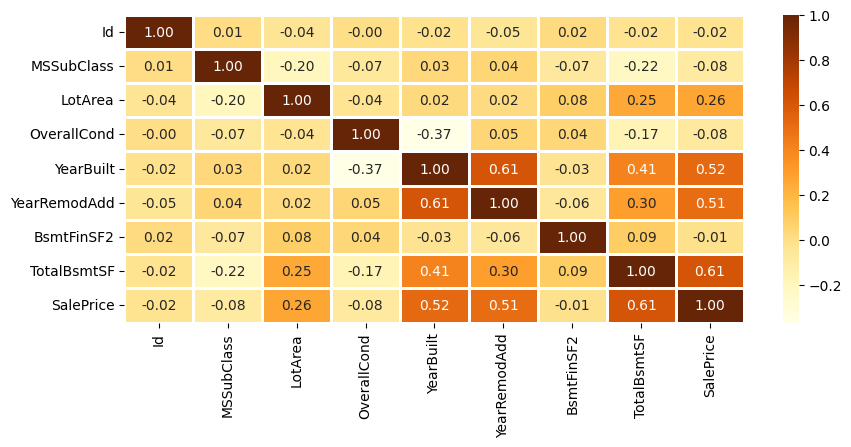

In [37]:
# Creates a heatmap
# we only want numerical features to show correlation
numerical_dataset = dataset.select_dtypes(include=['number'])

# size of the figure
plt.figure(figsize=(10, 4))
# format the chart referrencing
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
sns.heatmap(numerical_dataset.corr(),
           cmap = 'YlOrBr',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

## Categorical Features
The following bar plot shows how much each categorical features has unique values within their respected category. For example, how many building types are there and how does this compare to the other categorical features.

<Axes: title={'center': 'No. Unique Values of Categorical Features'}>

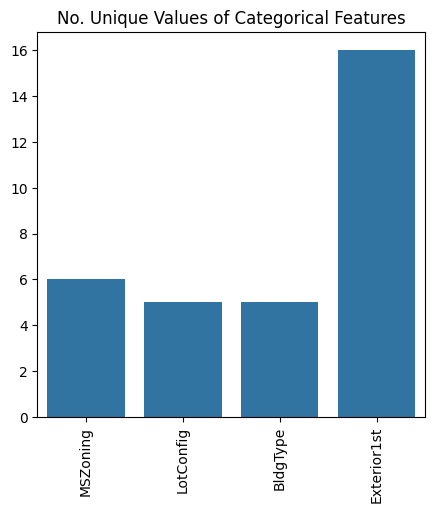

In [34]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(5,5))
plt.title('No. Unique Values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

### Comparison of All Catergories
The following graphs shows all relationships of the categories in seperate graphs to comprehend the information a little easier.

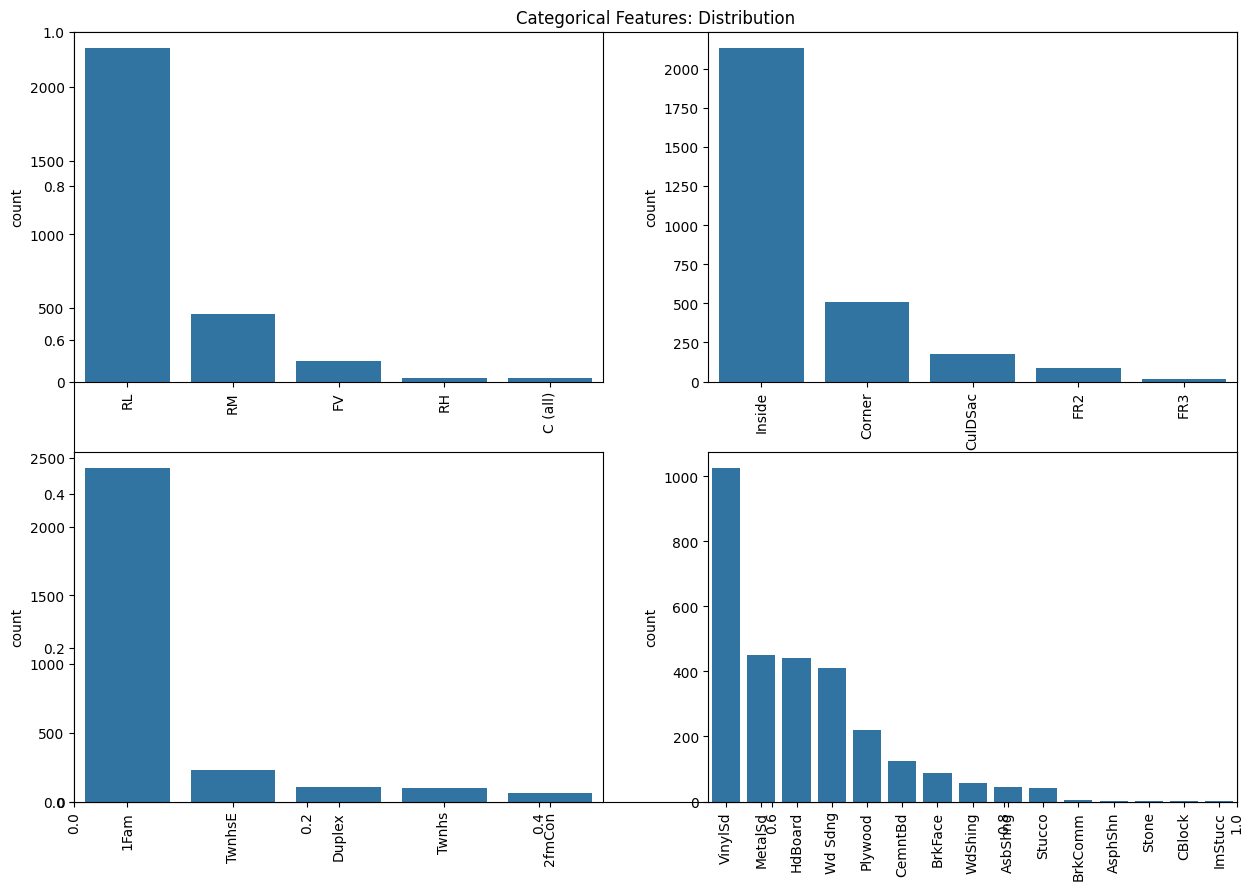

In [33]:
#
plt.figure(figsize=(15, 10))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

#
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Data Cleaning


## Empty/Null Values
There are several different ways to identify and eliminate empty cells or null values from the data. Sometimes these null values are actually...well, valuable. 

1. We know the at *Id* column is not needed because it is identical to the positions of each house within the columns, so we can *drop* it and move the other columns over to take its place:
```
dataset.drop(['Id'],
             axis=1,
             inplace=True)
```
2. Another strategy is replacing blank values with meaningful ones if we really don't want them null. In this case we want the *SalePrice* to not be null and to always have a reasonable value, so we replace it with the mean of all other sales prices reported.
```
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())
```
3. Now, we want nothing to have null values and if they do we are comfortable dropping them. We will create a new dataset to preserve the original data.
```
new_dataset = dataset.dropna()
```
4. Lastly, we double check if any null values exist. Ideally, each column would be zero.
```
new_dataset.isnull().sum()
```

In [23]:
dataset.drop(['Id'],
            axis=1,
            inplace=True)

dataset['SalePrice'] = dataset['SalePrice'].fillna(
 dataset['SalePrice'].mean())

new_dataset = dataset.dropna()

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# Converting Data Types for Analytical Purposes
## OneHotEncoder

We are going to convert categorical data into integers so gain access to how to format our analysis with these categories. 

In [24]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [27]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# This code is modified by Susobhan Akhuli

Now that the categories are transferred 

```
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

```


## Splitting Dataset into Training and Testing
We are going to make the SalePrice into one axis with the rest into another, so we can easily compare the Sales Price to the rest of the housing features.

```
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8,
                                                     test_size=0.2,
                                                     random_state=0)

```

The ***sklearn library*** provides a lot of functions that help measure regression. i.e. mean_absolute_percentage_error, support vector machine, Random Forest regression, linear regression, CatBoost Classifier, etc.

SVM:
```
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
```

Random Forest:
```
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)
```

linear regression:
```
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
```

CatBoost Classifier:
```
!pip install catboost # install the catboost package
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

```

# [Project Credit](https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/)